In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
data = pd.read_csv(r"C:\Users\91942\OneDrive\Desktop\mcdonalds.csv")
print("Dataset Loaded Successfully!")

Dataset Loaded Successfully!


In [3]:
# Columns with binary values
binary_columns = ['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 
                  'fast', 'cheap', 'tasty', 'expensive', 'healthy', 'disgusting']

# Convert "Yes"/"No" to 1/0
for col in binary_columns:
    data[col] = data[col].apply(lambda x: 1 if x == "Yes" else 0)

# Clean 'Like' column to extract numeric scores
import re
def extract_numeric(value):
    match = re.search(r"[-+]?\d+", str(value))
    return int(match.group()) if match else np.nan
data['Like'] = data['Like'].apply(extract_numeric)

# Encode categorical variables
label_encoder = LabelEncoder()
data['VisitFrequency'] = label_encoder.fit_transform(data['VisitFrequency'])
data['Gender'] = label_encoder.fit_transform(data['Gender'])

print("Data Cleaning Complete!")


Data Cleaning Complete!


In [4]:
# Scaling the data for clustering
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

print("Data Scaling Complete!")


Data Scaling Complete!


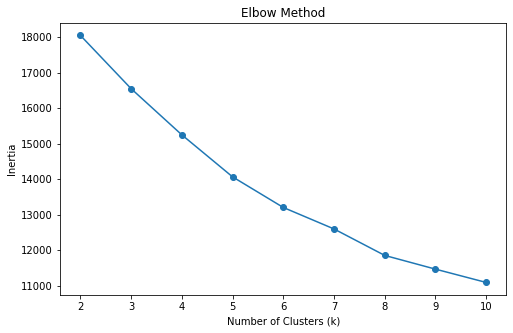

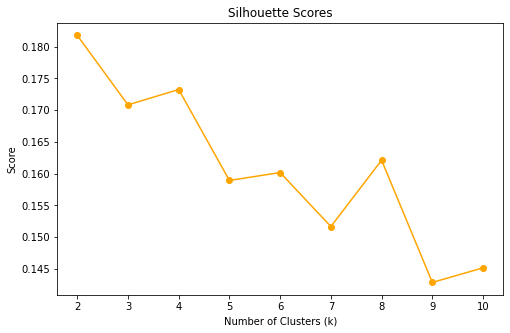

Optimal Cluster Number Analysis Complete!


In [5]:
# Find the optimal number of clusters using the Elbow Method
inertia = []
silhouette_scores = []

for k in range(2, 11):  # Test for k = 2 to 10
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(scaled_data, kmeans.labels_))

# Plot Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(range(2, 11), inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()

# Plot Silhouette Scores
plt.figure(figsize=(8, 5))
plt.plot(range(2, 11), silhouette_scores, marker='o', color='orange')
plt.title('Silhouette Scores')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Score')
plt.show()

print("Optimal Cluster Number Analysis Complete!")


In [6]:
# Apply KMeans with the chosen number of clusters
optimal_k = 3  # Replace with the value you determine
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(scaled_data)

# Add cluster labels to the dataset
data['Cluster'] = clusters
print("Clustering Complete!")


Clustering Complete!


In [7]:
# Cluster Profiles
cluster_profiles = data.groupby('Cluster').mean()
print(cluster_profiles)

# Save profiles for reporting
cluster_profiles.to_csv("cluster_profiles.csv", index=True)

print("Cluster Profiling Complete!")


            yummy  convenient     spicy  fattening    greasy      fast  \
Cluster                                                                  
0        0.036329    0.783939  0.084130   0.957935  0.699809  0.829828   
1        0.742690    0.947368  0.128655   0.000000  0.087719  0.929825   
2        0.865613    0.984190  0.092227   1.000000  0.505929  0.942029   

            cheap     tasty  expensive   healthy  disgusting      Like  \
Cluster                                                                  
0        0.493308  0.126195   0.462715  0.055449    0.558317 -2.302103   
1        0.684211  0.836257   0.216374  0.614035    0.035088  2.766082   
2        0.652174  0.957839   0.317523  0.204216    0.072464  2.450593   

               Age  VisitFrequency    Gender  
Cluster                                       
0        48.973231        2.711281  0.483748  
1        49.847953        2.584795  0.520468  
2        40.413702        2.599473  0.425560  
Cluster Profiling Compl

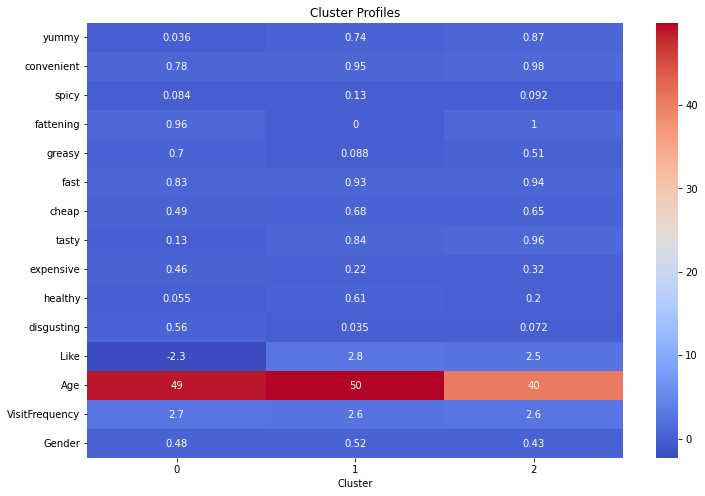

In [8]:
# Heatmap of cluster means
plt.figure(figsize=(12, 8))
sns.heatmap(cluster_profiles.T, cmap='coolwarm', annot=True)
plt.title('Cluster Profiles')
plt.show()


In [9]:
# Save the segmented data
data.to_csv("segmented_data.csv", index=False)
print("Segmented Dataset Saved as 'segmented_data.csv'!")


Segmented Dataset Saved as 'segmented_data.csv'!


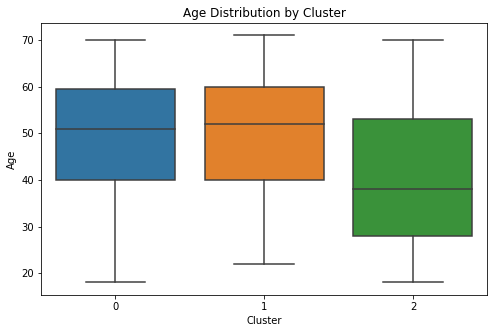

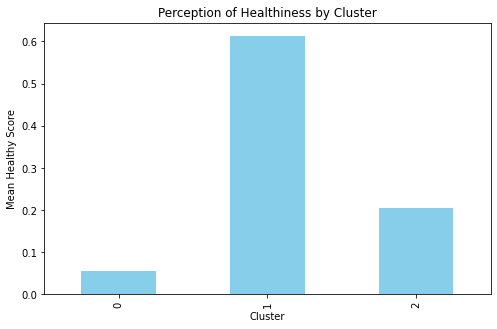

In [10]:
# Example: Age distribution by cluster
plt.figure(figsize=(8, 5))
sns.boxplot(x='Cluster', y='Age', data=data)
plt.title('Age Distribution by Cluster')
plt.show()

# Example: Cluster-wise mean scores for "healthy" perception
plt.figure(figsize=(8, 5))
data.groupby('Cluster')['healthy'].mean().plot(kind='bar', color='skyblue')
plt.title('Perception of Healthiness by Cluster')
plt.ylabel('Mean Healthy Score')
plt.show()
